In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 



{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [2]:
feature_names = X.columns.tolist()
feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [3]:
X.shape

(581012, 54)

In [4]:
X = X.drop(columns=[col for col in X.columns if col.startswith("Soil_Type")])
# X = X.drop(columns=[col for col in X.columns if col.startswith("Wilderness_Area")])

In [5]:
X = X.sample(n=10000, random_state=42)

In [6]:
feature_names = X.columns.tolist()
feature_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [7]:
print(X["Aspect"].describe())

count    10000.000000
mean       155.888700
std        111.942027
min          0.000000
25%         59.000000
50%        128.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64


In [8]:
# Define 30 equal-sized angle bins (12° each)
bin_edges = np.arange(0, 361, 12)  # From 0 to 360 in steps of 12
bin_labels = [f"[{int(bin_edges[i])}°–{int(bin_edges[i+1])}°)" for i in range(len(bin_edges)-1)]

# Use pandas.cut to bin the aspect values
X["aspect_group"] = pd.cut(X["Aspect"] % 360, bins=bin_edges, labels=bin_labels, include_lowest=True, right=False)

# Check group sizes
print(X["aspect_group"].value_counts().sort_index())

aspect_group
[0°–12°)       497
[12°–24°)      485
[24°–36°)      522
[36°–48°)      551
[48°–60°)      491
[60°–72°)      511
[72°–84°)      474
[84°–96°)      430
[96°–108°)     421
[108°–120°)    348
[120°–132°)    369
[132°–144°)    304
[144°–156°)    268
[156°–168°)    280
[168°–180°)    245
[180°–192°)    238
[192°–204°)    190
[204°–216°)    211
[216°–228°)    185
[228°–240°)    165
[240°–252°)    170
[252°–264°)    194
[264°–276°)    198
[276°–288°)    231
[288°–300°)    230
[300°–312°)    289
[312°–324°)    338
[324°–336°)    389
[336°–348°)    356
[348°–360°)    420
Name: count, dtype: int64


In [9]:
aspect_bin_labels = [f"[{int(bin_edges[i])}°–{int(bin_edges[i+1])}°)" for i in range(len(bin_edges)-1)]

In [10]:
X = X.drop(columns=["Aspect"])

In [11]:
grouped_data = []

for _, group in X.groupby("aspect_group"):
    group_data = group.drop(columns=["aspect_group"]).to_numpy()
    grouped_data.append(group_data)

/tmp/ipykernel_1595840/19457812.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, group in X.groupby("aspect_group"):


In [12]:
grouped_data

[array([[3217,   10,   30, ...,    0,    1,    0],
        [3422,   19,  408, ...,    1,    0,    0],
        [3171,   11,  258, ...,    0,    1,    0],
        ...,
        [2739,   21,   42, ...,    0,    0,    0],
        [2761,    9,  124, ...,    0,    1,    0],
        [2794,    8,   30, ...,    0,    0,    0]], shape=(497, 13)),
 array([[2962,   14,  150, ...,    0,    0,    0],
        [2602,   16,  272, ...,    0,    1,    0],
        [2822,    8,  108, ...,    0,    0,    0],
        ...,
        [2540,   19,  210, ...,    0,    1,    0],
        [3280,   13,  750, ...,    0,    1,    0],
        [3224,   17,  201, ...,    0,    1,    0]], shape=(485, 13)),
 array([[2572,    9,  201, ...,    0,    1,    0],
        [3011,    6,   42, ...,    0,    1,    0],
        [2775,   26,  277, ...,    0,    1,    0],
        ...,
        [3255,    8,  272, ...,    0,    0,    0],
        [2991,   17, 1154, ...,    0,    1,    0],
        [2985,   10,  379, ...,    0,    0,    0]], shap

In [13]:
datasets = grouped_data

In [14]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [15]:
classifier = OneClassSMMClassifier(nu=0.1)

In [16]:
classifier.fit(datasets)

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [ ]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa.

calculating rho.

[2.87847398 2.87847344 2.8784733  2.87847289 2.87846339]


In [ ]:
decision

array([ 1.39123725e-02,  2.55532397e-02,  1.99131929e-02,  7.11142071e-03,
        2.66249833e-02,  2.57991235e-06,  1.81877486e-02,  1.10447224e-02,
        1.48688145e-02,  3.94205771e-03,  1.96816278e-02,  3.08245228e-02,
        3.99230205e-02,  4.31486002e-02,  2.03573658e-06,  1.79547697e-02,
        1.89775428e-06,  2.43700583e-02,  1.49337607e-06,  2.84528331e-02,
       -8.00677927e-06,  6.39733316e-04,  1.75996960e-02,  3.86899571e-02,
        2.33783172e-02,  2.42108083e-02,  5.64438132e-03,  2.70777338e-02,
        3.70089580e-02,  3.17271390e-02])

In [ ]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [ ]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[20]

In [ ]:
aspect_bin_labels[outlier_indices[0]]

'[240°–252°)'

In [ ]:
feature_names.remove("Aspect")

In [23]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
# ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
# ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

In [24]:
# shapley_values = ocsmm_shap.return_deterministic_shapley_values()*1000   # scaling for better visualization since the decision values are very small


In [25]:
import numpy as np
# np.save("shapley_values_forest_before.npy", shapley_values)
shapley_values = np.load("shapley_values_forest_before.npy")

In [26]:
shapley_values.T.shape

(30, 13)

In [27]:
feature_names

['Elevation',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

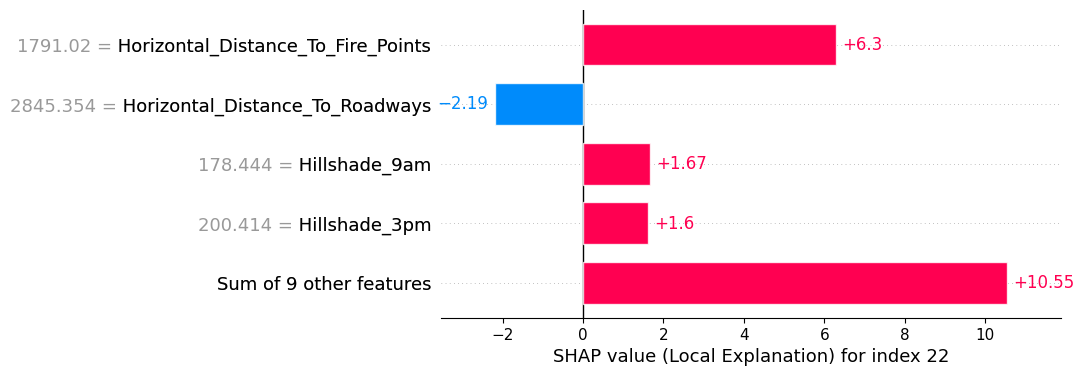

In [ ]:
from src.utils.visualisation.deterministic_values import local_bar_plot_ocsmm, global_bar_plot_ocsmm
local_bar_plot_ocsmm(shapley_values.T, 22, feature_names=feature_names, datasets=datasets)   # inlier

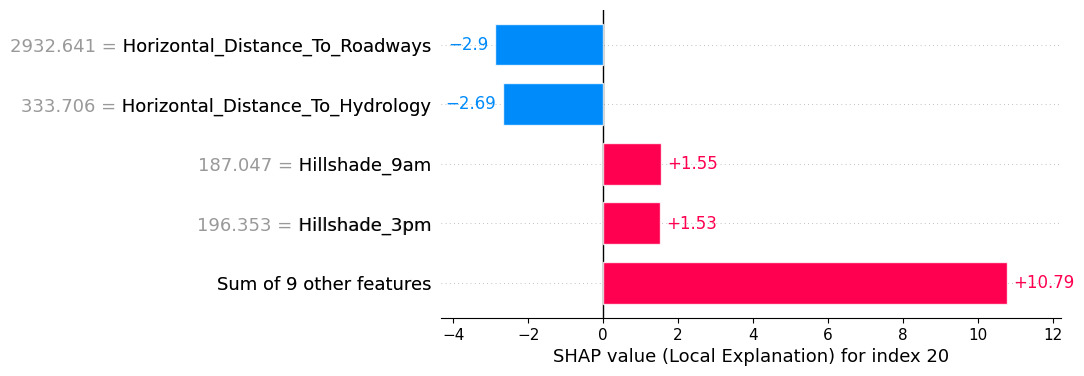

In [31]:
local_bar_plot_ocsmm(shapley_values.T, 20, feature_names=feature_names, datasets=datasets)

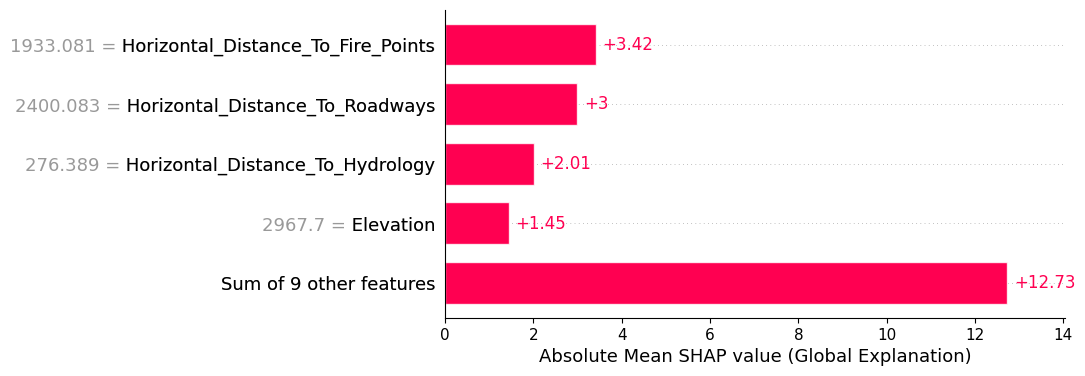

In [32]:
import numpy as np
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values, feature_names=feature_names, datasets=datasets)

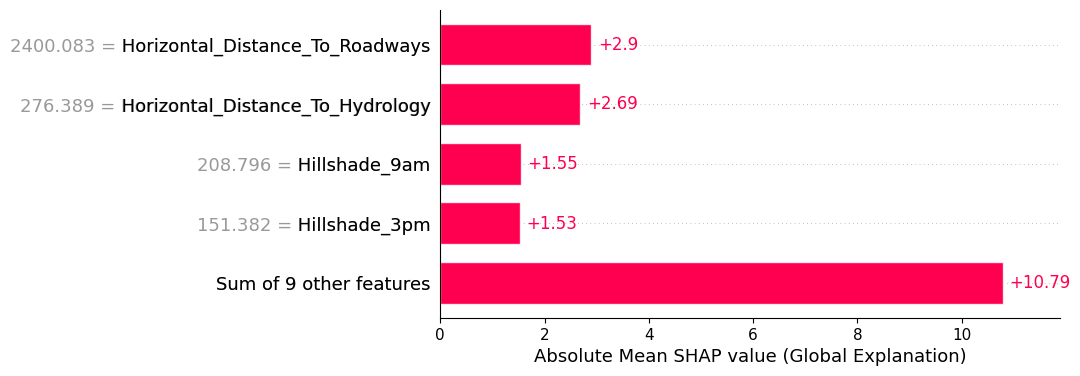

In [33]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot_ocsmm(mean_abs_shap_values_outlier, feature_names=feature_names, datasets=datasets)

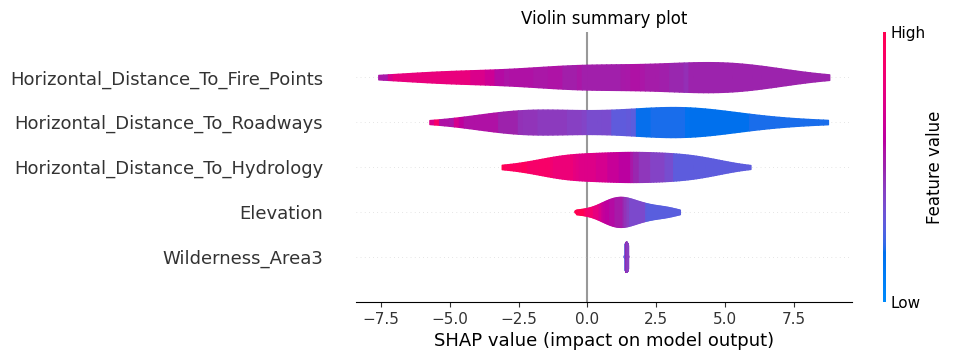

In [34]:
from src.utils.visualisation.deterministic_values import summary_plot_ocsmm

summary_plot_ocsmm(shapley_values=shapley_values.T, feature_names=feature_names, datasets=datasets)

## Add an artificial feature

In [35]:
X

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,aspect_group
250728,3351,27,726,124,3813,192,252,180,2271,1,0,0,0,[204°–216°)
246788,2732,7,212,1,1082,231,236,137,912,0,0,1,0,[120°–132°)
407714,2572,9,201,25,957,216,222,142,2191,0,0,1,0,[24°–36°)
25713,2824,13,417,39,3223,233,214,110,6478,1,0,0,0,[60°–72°)
21820,2529,5,120,9,1092,227,231,139,4983,1,0,0,0,[84°–96°)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172175,3254,18,607,146,6035,173,246,210,2820,1,0,0,0,[264°–276°)
565172,2807,17,268,88,2377,180,249,205,1879,0,0,1,0,[252°–264°)
485894,3222,28,644,222,859,239,229,99,1399,0,0,1,0,[144°–156°)
487255,3105,14,228,32,3004,194,214,158,1550,0,0,1,0,[348°–360°)


In [36]:
X_scaled_df = pd.DataFrame(X, columns=X.columns)
grouped_data = []

for i, (_, group) in enumerate(X_scaled_df.groupby('aspect_group')):
    group_data = group.drop(columns=['aspect_group']).to_numpy()
    artificial_feature = np.ones((group_data.shape[0],1))  # Default value = 1
    if i == 0 : 
        artificial_feature.fill(500)
    
    group_data = np.hstack((group_data, artificial_feature))  # Append feature
    grouped_data.append(group_data)

/tmp/ipykernel_874438/3138541065.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, (_, group) in enumerate(X_scaled_df.groupby('aspect_group')):


In [37]:
feature_names.append('artificial_feature')

In [38]:
datasets = grouped_data

In [39]:
datasets

[array([[3.217e+03, 1.000e+01, 3.000e+01, ..., 1.000e+00, 0.000e+00,
         5.000e+02],
        [3.422e+03, 1.900e+01, 4.080e+02, ..., 0.000e+00, 0.000e+00,
         5.000e+02],
        [3.171e+03, 1.100e+01, 2.580e+02, ..., 1.000e+00, 0.000e+00,
         5.000e+02],
        ...,
        [2.739e+03, 2.100e+01, 4.200e+01, ..., 0.000e+00, 0.000e+00,
         5.000e+02],
        [2.761e+03, 9.000e+00, 1.240e+02, ..., 1.000e+00, 0.000e+00,
         5.000e+02],
        [2.794e+03, 8.000e+00, 3.000e+01, ..., 0.000e+00, 0.000e+00,
         5.000e+02]], shape=(497, 14)),
 array([[2.962e+03, 1.400e+01, 1.500e+02, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        [2.602e+03, 1.600e+01, 2.720e+02, ..., 1.000e+00, 0.000e+00,
         1.000e+00],
        [2.822e+03, 8.000e+00, 1.080e+02, ..., 0.000e+00, 0.000e+00,
         1.000e+00],
        ...,
        [2.540e+03, 1.900e+01, 2.100e+02, ..., 1.000e+00, 0.000e+00,
         1.000e+00],
        [3.280e+03, 1.300e+01, 7.500e+02, ..., 1.000e+0

In [40]:
feature_names

['Elevation',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'artificial_feature']

In [49]:
classifier = OneClassSMMClassifier(nu=0.1)

In [50]:
classifier.fit(datasets)

Best gamma found.

Kappa matrix calculated.

Found the alphas.



In [51]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa.

calculating rho.

[2.80739864 2.83349872 2.83349866 2.83349879 2.83349893]


In [52]:
decision

array([-0.02088011,  0.03447413,  0.02865778,  0.01635689,  0.0343049 ,
        0.00877338,  0.02584754,  0.01967278,  0.02246868,  0.01166086,
        0.02852143,  0.03861205,  0.04646658,  0.05040295,  0.00521997,
        0.02331358,  0.00658852,  0.031493  ,  0.00521991,  0.0339946 ,
        0.00522004,  0.00522017,  0.02212669,  0.04532331,  0.03143679,
        0.03348361,  0.01534945,  0.03651004,  0.04644526,  0.04040323])

In [53]:
y_pred

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [54]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[0]

In [55]:
aspect_bin_labels[outlier_indices[0]]

'[0°–12°)'

In [57]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

Calculating projections:   0%|          | 0/16383 [00:00<?, ?it/s]

Calculating projections: 100%|██████████| 16383/16383 [11:27<00:00, 23.84it/s]


In [58]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [59]:
shapley_values

tensor([[ 2.2841e-03,  2.9756e-03,  2.2239e-03,  2.2357e-03,  1.3801e-03,
          2.5001e-03,  2.0722e-03,  2.0562e-03,  1.6725e-03,  1.4112e-03,
          3.2671e-03,  2.8667e-03,  6.6546e-04,  8.3078e-04, -2.6418e-04,
         -1.4952e-03, -1.0286e-03,  1.5880e-03, -1.7118e-04,  3.5728e-03,
          6.3771e-04, -3.8220e-04, -8.1750e-05,  6.8078e-04,  1.1840e-03,
          4.5074e-03,  4.2171e-03,  4.8725e-03,  3.0873e-03,  2.8871e-03],
        [ 1.4442e-03,  1.6094e-03,  1.7910e-03,  1.3380e-03,  1.3315e-03,
          1.2410e-03,  1.2675e-03,  1.0051e-03,  1.3257e-03,  1.1778e-03,
          1.9633e-03,  2.0783e-03,  2.1295e-03,  2.0821e-03,  1.8152e-03,
          1.9706e-03,  2.1138e-03,  2.6505e-03,  1.5346e-03,  2.1074e-03,
          2.4364e-03,  1.8499e-03,  1.8429e-03,  2.0143e-03,  2.2678e-03,
          1.6169e-03,  1.5038e-03,  1.3333e-03,  1.9340e-03,  1.3377e-03],
        [ 1.3009e-03, -2.0232e-05, -3.3155e-04,  1.7867e-03,  3.8841e-03,
          4.3691e-03,  4.5430e-03,  

In [60]:
import numpy as np
np.save("shapley_values_forest_after.npy", shapley_values)
shapley_values = np.load("shapley_values_forest_after.npy")

In [71]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()*100  # scaling for better visulaization

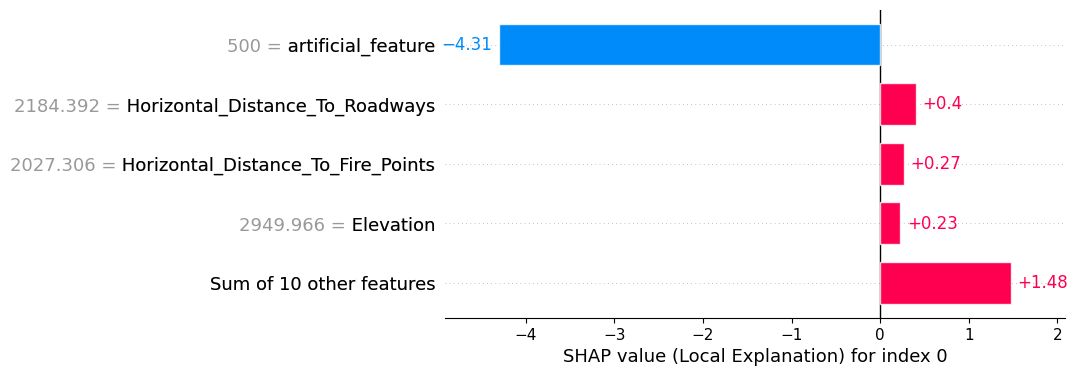

In [72]:
from src.utils.visualisation.deterministic_values import local_bar_plot_ocsmm, global_bar_plot_ocsmm
local_bar_plot_ocsmm(shapley_values.T.numpy(), 0, feature_names=feature_names, datasets=datasets)

Since this group now has an abnormal artificial feature added, the feature attributions change accordingly. Now the artificial feature is the one more responsible for the outcome and the older remaining features just shift a little to a lower value. (some positive contributions becomes negative)

The artificial_feature has the highest shapley value for the altered group as expected

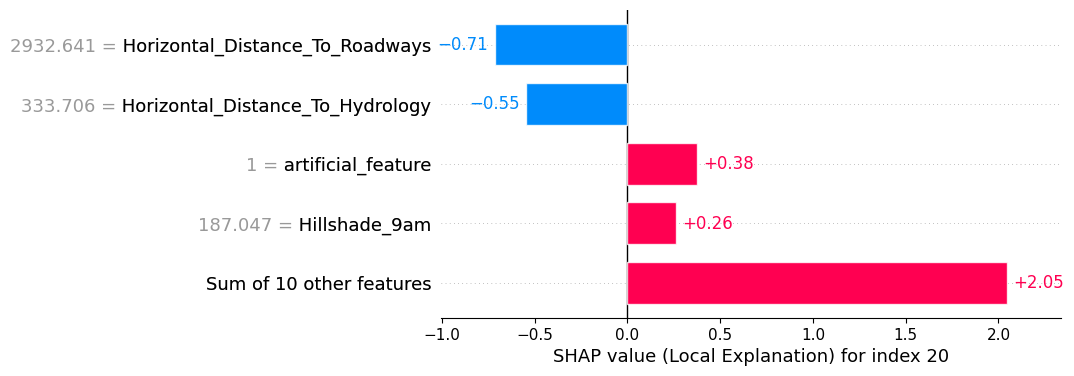

In [73]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 20, feature_names=feature_names, datasets=datasets)

In [74]:
# local_bar_plot(shapley_values, 1, feature_names=feature_names) # inlier 

/tmp/ipykernel_874438/3584497283.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)


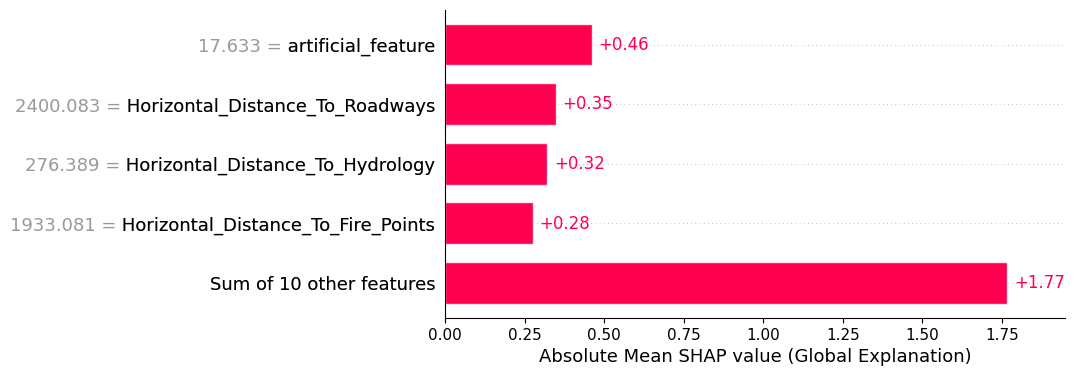

In [75]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot_ocsmm(mean_abs_shap_values.numpy(), feature_names=feature_names, datasets=datasets)

/tmp/ipykernel_874438/1316517322.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1)


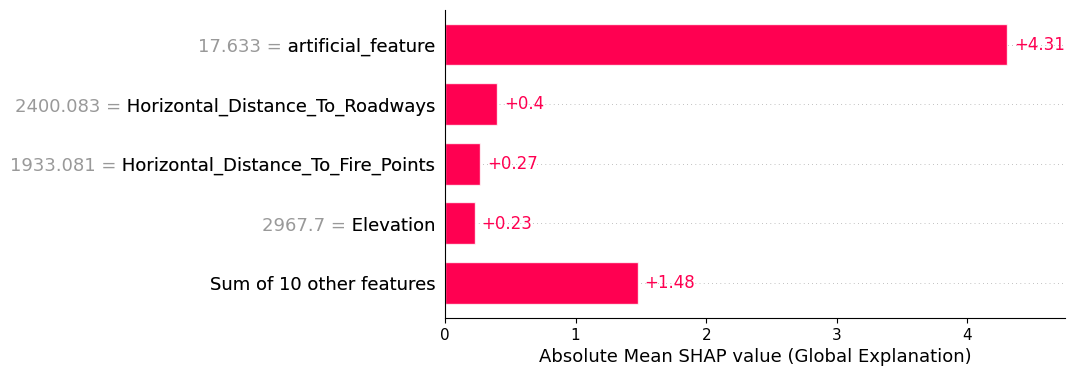

In [77]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot_ocsmm(mean_abs_shap_values_outlier.numpy(), feature_names=feature_names, datasets=datasets)